In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11


In [2]:
# Edit filename if needed
df = pd.read_csv('amazon_soft_toys_sponsored_enhanced.csv')
print(f"Loaded {len(df)} sponsored soft toy products")
df.head()


Loaded 579 sponsored soft toy products


,title,brand,rating,reviews,price,image_url,product_url,sponsored
0,"CozyHug Weighted Plushie – Your Warm, Comforti...",Sponsored,0.0,1799,1799,https://m.media-amazon.com/images/I/51jj6TkyJh...,NaN,True
1,Enchanted Threads Handmade Crochet Dog Plush T...,Sponsored,0.0,1200,1200,https://m.media-amazon.com/images/I/61tmfnAxXA...,NaN,True
2,LOVEY DOVEY Cute Polar Bear Stuffed Soft Toy f...,Sponsored,3.0,111,286,https://m.media-amazon.com/images/I/41-B5ZTBVT...,NaN,True
3,ADORA Baby Plushies - 25 cm Blue Lovable Hugga...,Sponsored,4.6,110,526,https://m.media-amazon.com/images/I/612-NnCMoQ...,NaN,True
4,Madhubala Teddy Bear 3 Feet Giant Stuffed Plus...,Sponsored,2.0,1,395,https://m.media-amazon.com/images/I/61k--qGrKe...,NaN,True


## 🧹 Step 1: Clean the Data

To ensure my dataset is tidy and ready for analysis, I begin by performing the following cleaning steps:

- **Remove duplicates**: I check for and drop any duplicate entries to avoid biased results.
- **Convert to numerical format**: I make sure columns like `price`, `reviews`, and `ratings` are properly converted to numeric types so they can be used in calculations.
- **Standardize values**: I clean up inconsistent formatting—for example, I remove any `₹` symbols from the `price` column so the values are purely numeric.

---

## 🔧 Step 2: Prepare the Data for Analysis

Once cleaned, I prepare the dataset by:

- **Converting data types**: I ensure that all relevant columns are cast to the correct data types—like turning date strings into `datetime` objects or ratings into `float`s.
- **Handling missing or corrupted values**: I inspect the dataset for any `NaN`, `null`, or clearly corrupted values and handle them appropriately—either by filling them in, dropping rows, or using imputation techniques.


In [3]:
import pandas as pd
import re

def extract_brand_from_title(title):
    """Enhanced brand extraction from product titles"""
    
    if pd.isna(title) or title == "":
        return "Unknown"
    
    # Comprehensive brand list from your CSV analysis
    known_brands = [
        'CozyHug', 'Enchanted Threads', 'LOVEY DOVEY', 'ADORA', 'Madhubala',
        'Storescent', 'Babique', 'Tickles', 'Amazon Brand', 'Jam & Honey',
        'HUG \'n\' FEEL SOFT TOYS', 'HOMECUTE', 'BABY FOREST', 'Primo Cleats',
        'SHAPZE', 'VIH-AAN', 'Storio', 'Niku', 'Webby', 'Dimpy', 'Frantic',
        'Ultra', 'Cuddles', 'Mebby', 'Archies', 'Toyshine', 'Babyhug',
        'Deals India', 'FunBlast', 'GUND', 'Ty', 'Melissa & Doug', 'Aldea',
        'odinbirds', 'SCOOBA', 'MGP Creation', 'Richy Toys', 'One94Store',
        'WILD REPUBLIC', 'YBN', 'Mirada', 'Krow', 'AVSHUB', 'Thrive Toys',
        'NOH Creations', 'Pandaworld', 'Crispy Toys', 'Vaishno', 'AVS',
        'Mashes', 'Toys Guru', 'SUPER TOY', 'BACK BANCHERS', 'DISHIV',
        'Asmita Enterprise', 'SOPTOOL', 'MADHUBALA', 'Nexivntra', 'Webby',
        'Actino', 'Masha and the Bear', 'CLICK4DEAL', 'BEST4U TOYS',
        'White Star', 'Panda\'s Box', 'SnuggyBuggy', 'CloudPeak', 'TechMax',
        'TOYTALES', 'Hapsters', 'TOMTEDDY', 'Tinytotem', 'Pegasos',
        'VEDA', 'KIZDY', 'Galaxy world', 'MA Toys', 'RVA', 'BLOOM PLEX',
        'CHANT HARI', 'VOIDROP', 'SWARAH COLLECTIONS', 'NISHAD CREATIONS',
        'KEKEMI', 'VARUSH', 'Dholu', 'Fusked Flufies', 'QTM', 'SADAR DEAL',
        'Tarakid', 'LITTLE GINNIE', 'LoopHoop', 'PH Artistic', 'AAYU',
        'Vedartah', 'CHIRKUT', 'FUNPLANET', 'BEMOX', 'SUNNFUN', 'Toyshine',
        'CloudPeakEnt', 'Richy', 'Aleda', 'NESTA TOYS', '4AJ BAZAAR'
    ]
    
    title_lower = title.lower()
    
    # Method 1: Direct brand matching
    for brand in known_brands:
        if brand.lower() in title_lower:
            return brand
    
    # Method 2: Extract from common brand patterns
    brand_patterns = [
        r'^([A-Z][A-Z\s&\-\.]+)\s',  # Uppercase words at start
        r'([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)\s',  # Title case brands
        r'([A-Z]{2,}(?:\s+[A-Z]{2,})*)\s'  # All caps brands
    ]
    
    for pattern in brand_patterns:
        match = re.search(pattern, title)
        if match:
            potential_brand = match.group(1).strip()
            if len(potential_brand) > 2 and len(potential_brand) < 30:
                # Validate it's not a common word
                exclude_words = ['Soft', 'Toy', 'Plush', 'Stuffed', 'Teddy', 'Bear', 'Cute', 'Giant', 'Super']
                if potential_brand not in exclude_words:
                    return potential_brand
    
    # Method 3: Extract first meaningful word
    words = title.split()
    if words:
        first_word = words[0].strip()
        if len(first_word) > 2 and first_word.isalpha():
            return first_word
    
    return "Generic"

# Apply the function to your dataframe
def fix_brand_column(df):
    """Fix the brand column by extracting from title"""
    df['brand_corrected'] = df['title'].apply(extract_brand_from_title)
    return df

# Usage example
df = pd.read_csv('amazon_soft_toys_sponsored_enhanced.csv')
df_fixed = fix_brand_column(df)

# Replace the original brand column
df_fixed['brand'] = df_fixed['brand_corrected']
df_fixed.drop('brand_corrected', axis=1, inplace=True)

# Save the corrected data
df_fixed.to_csv('amazon_soft_toys_brands_fixed.csv', index=False)


In [32]:
df = pd.read_csv('amazon_soft_toys_brands_fixed.csv')
print(f"📊 Loaded {len(df)} sponsored soft toy products")
print(f"Columns: {list(df.columns)}")
df.head()

📊 Loaded 579 sponsored soft toy products
Columns: ['title', 'brand', 'rating', 'reviews', 'price', 'image_url', 'product_url', 'sponsored']


,title,brand,rating,reviews,price,image_url,product_url,sponsored
0,"CozyHug Weighted Plushie – Your Warm, Comforti...",CozyHug,0.0,1799,1799,https://m.media-amazon.com/images/I/51jj6TkyJh...,NaN,True
1,Enchanted Threads Handmade Crochet Dog Plush T...,Enchanted Threads,0.0,1200,1200,https://m.media-amazon.com/images/I/61tmfnAxXA...,NaN,True
2,LOVEY DOVEY Cute Polar Bear Stuffed Soft Toy f...,LOVEY DOVEY,3.0,111,286,https://m.media-amazon.com/images/I/41-B5ZTBVT...,NaN,True
3,ADORA Baby Plushies - 25 cm Blue Lovable Hugga...,ADORA,4.6,110,526,https://m.media-amazon.com/images/I/612-NnCMoQ...,NaN,True
4,Madhubala Teddy Bear 3 Feet Giant Stuffed Plus...,Madhubala,2.0,1,395,https://m.media-amazon.com/images/I/61k--qGrKe...,NaN,True


### ✅ Additional Cleaning Step

I also identified entries that had **0 ratings but a non-zero review count**, which is inconsistent and likely indicates false or unreliable information. I removed these items from the dataset to maintain data integrity and ensure accurate analysis.


In [33]:
# Check current state before modification
print("🔍 BEFORE MODIFICATION:")
print(f"Products with rating = 0: {len(df[df['rating'] == 0])}")
print(f"Products with reviews > 0 but rating = 0: {len(df[(df['rating'] == 0) & (df['reviews'] > 0)])}")

# Show some examples of products that will be affected
affected_products = df[(df['rating'] == 0) & (df['reviews'] > 0)]
if not affected_products.empty:
    print(f"\n⚠️  Products to be affected ({len(affected_products)} total):")
    print(affected_products[['title', 'brand', 'rating', 'reviews', 'price']].head())

# Apply the modification: Set reviews to 0 where rating is 0
df.loc[df['rating'] == 0, 'reviews'] = 0

# Check state after modification
print("\n✅ AFTER MODIFICATION:")
print(f"Products with rating = 0: {len(df[df['rating'] == 0])}")
print(f"Products with reviews > 0 but rating = 0: {len(df[(df['rating'] == 0) & (df['reviews'] > 0)])}")

# Verify data consistency
print(f"\n🔍 DATA CONSISTENCY CHECK:")
print(f"   ✅ All products with rating=0 now have reviews=0: {len(df[(df['rating'] == 0) & (df['reviews'] > 0)]) == 0}")
print(f"   📊 Products with both rating>0 and reviews>0: {len(df[(df['rating'] > 0) & (df['reviews'] > 0)])}")
print(f"   📊 Products with rating>0 but reviews=0: {len(df[(df['rating'] > 0) & (df['reviews'] == 0)])}")

print(f"\n✅ DataFrame updated successfully!")
print(f"Total products: {len(df)}")


🔍 BEFORE MODIFICATION:
Products with rating = 0: 164
Products with reviews > 0 but rating = 0: 164

⚠️  Products to be affected (164 total):
                                                title              brand  \
0   CozyHug Weighted Plushie – Your Warm, Comforti...            CozyHug   
1   Enchanted Threads Handmade Crochet Dog Plush T...  Enchanted Threads   
5   CozyHug Weighted Plushie – Your Warm, Comforti...            CozyHug   
13  HOMECUTE Large Soft Toys Elephant, Big Size Fi...           HOMECUTE   
14  BABY FOREST Cuddly Buddies King Lio Soft Toy |...        BABY FOREST   

    rating  reviews  price  
0      0.0     1799   1799  
1      0.0     1200   1200  
5      0.0     1799   1799  
13     0.0      599    599  
14     0.0     1515   1515  

✅ AFTER MODIFICATION:
Products with rating = 0: 164
Products with reviews > 0 but rating = 0: 0

🔍 DATA CONSISTENCY CHECK:
   ✅ All products with rating=0 now have reviews=0: True
   📊 Products with both rating>0 and reviews>0:

In [34]:
# Basic data information
print("="*60)
print("📋 DATASET OVERVIEW")
print("="*60)
print(f"Total products: {len(df)}")
print(f"Columns: {len(df.columns)}")
print(f"Data types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


📋 DATASET OVERVIEW
Total products: 579
Columns: 8
Data types:
title           object
brand           object
rating         float64
reviews          int64
price            int64
image_url       object
product_url    float64
sponsored         bool
dtype: object

Missing values:
title            0
brand            0
rating           0
reviews          0
price            0
image_url        0
product_url    579
sponsored        0
dtype: int64

Basic statistics:


,rating,reviews,price,product_url
count,579.000000,579.000000,579.000000,0.0
mean,2.696546,467.010363,661.279793,NaN
std,1.828898,1980.764733,379.804627,NaN
min,0.000000,0.000000,159.000000,NaN
25%,0.000000,0.000000,399.000000,NaN
50%,3.600000,8.000000,573.000000,NaN
75%,4.100000,66.500000,799.000000,NaN
max,5.000000,13833.000000,2799.000000,NaN


In [35]:
df = df.drop(columns="product_url")

In [36]:
# Basic data information
print("="*60)
print("📋 DATASET OVERVIEW")
print("="*60)
print(f"Total products: {len(df)}")
print(f"Columns: {len(df.columns)}")
print(f"Data types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


📋 DATASET OVERVIEW
Total products: 579
Columns: 7
Data types:
title         object
brand         object
rating       float64
reviews        int64
price          int64
image_url     object
sponsored       bool
dtype: object

Missing values:
title        0
brand        0
rating       0
reviews      0
price        0
image_url    0
sponsored    0
dtype: int64

Basic statistics:


,rating,reviews,price
count,579.000000,579.000000,579.000000
mean,2.696546,467.010363,661.279793
std,1.828898,1980.764733,379.804627
min,0.000000,0.000000,159.000000
25%,0.000000,0.000000,399.000000
50%,3.600000,8.000000,573.000000
75%,4.100000,66.500000,799.000000
max,5.000000,13833.000000,2799.000000


In [37]:
# Remove duplicates
print("🧹 REMOVING DUPLICATES")
print("="*40)
initial_count = len(df)
df = df.drop_duplicates(subset=['title', 'brand', 'price', 'reviews'], keep='first')
removed_duplicates = initial_count - len(df)
print(f"✅ Removed {removed_duplicates} duplicate products")
print(f"📊 Dataset now contains {len(df)} unique products")


🧹 REMOVING DUPLICATES
✅ Removed 339 duplicate products
📊 Dataset now contains 240 unique products


In [38]:
# Clean and convert data types
print("🧹 CLEANING DATA TYPES")
print("="*40)

# Clean price column
def clean_price(price):
    if pd.isna(price):
        return 0
    if isinstance(price, str):
        # Remove ₹ symbol and commas
        price = str(price).replace('₹', '').replace(',', '').strip()
        try:
            return int(float(price))
        except:
            return 0
    return max(0, int(price))

# Clean rating column
def clean_rating(rating):
    if pd.isna(rating):
        return 0.0
    try:
        rating = float(rating)
        return max(0.0, min(5.0, rating))
    except:
        return 0.0

# Clean reviews column
def clean_reviews(reviews):
    if pd.isna(reviews):
        return 0
    if isinstance(reviews, str):
        reviews = str(reviews).replace(',', '').strip()
        try:
            return int(float(reviews))
        except:
            return 0
    return max(0, int(reviews))

# Apply cleaning functions
df['price'] = df['price'].apply(clean_price)
df['rating'] = df['rating'].apply(clean_rating)
df['reviews'] = df['reviews'].apply(clean_reviews)

# Clean brand column
df['brand'] = df['brand'].fillna('Unknown').replace(['', 'N/A', 'Sponsored'], 'Unknown')

# Clean title column
df['title'] = df['title'].fillna('Unknown Product')

print("✅ Data types cleaned successfully")

🧹 CLEANING DATA TYPES
✅ Data types cleaned successfully


In [39]:
# Convert to appropriate data types
print("🔄 CONVERTING DATA TYPES")
print("="*30)

df['price'] = df['price'].astype(int)
df['rating'] = df['rating'].astype(float)
df['reviews'] = df['reviews'].astype(int)
df['brand'] = df['brand'].astype(str)
df['title'] = df['title'].astype(str)
df['sponsored'] = df['sponsored'].astype(bool)



🔄 CONVERTING DATA TYPES


### 📊 Brand Performance Analysis

- **Objective:** My goal was to identify the top-performing brands within the "soft toys" category.

- **Metrics I Analyzed:**
    - **Brand Frequency:** I counted how many times each brand appeared in the sponsored product listings.
    - **Average Rating by Brand:** I examined customer ratings to understand which brands had the highest levels of satisfaction.

- **Actionable Insight:**
    - I was able to pinpoint the **top brands** that dominated the category.
    - I also discovered **high-rated but less frequent brands**, which could represent **untapped opportunities** for promotion or expansion.

- **Visualizations I Created:**
    - A **bar chart** to display the **top 5 brands by frequency**.
    - A **pie chart** to illustrate the **percentage share of these top brands** in the dataset.


In [42]:
# Generate comprehensive brand analysis
print("="*70)
print("📈 BRAND PERFORMANCE ANALYSIS - ACTIONABLE INSIGHTS")
print("="*70)

# 1. Top brands by frequency (market dominance)
brand_counts = df['brand'].value_counts()
top_brands = brand_counts.head(10)

print(f"\n🏆 TOP BRANDS DOMINATING THE CATEGORY:")
print("-" * 50)
for i, (brand, count) in enumerate(top_brands.items(), 1):
    market_share = (count / len(df)) * 100
    print(f"   {i:2d}. {brand:<20} : {count:3d} products ({market_share:.1f}% market share)")

# 2. Brand performance metrics (rating analysis)
brand_metrics = df.groupby('brand').agg({
    'rating': ['mean', 'count'],
    'reviews': 'mean',
    'price': 'mean'
}).round(2)

brand_metrics.columns = ['avg_rating', 'product_count', 'avg_reviews', 'avg_price']
brand_metrics = brand_metrics.sort_values('avg_rating', ascending=False)

print(f"\n⭐ HIGH-RATED BRANDS (QUALITY LEADERS):")
print("-" * 50)
top_rated_brands = brand_metrics.head(10)
for i, (brand, metrics) in enumerate(top_rated_brands.iterrows(), 1):
    print(f"   {i:2d}. {brand:<20} : {metrics['avg_rating']:.2f}⭐ ({metrics['product_count']} products)")

# 3. Identify high-rated but less frequent brands (untapped potential)
print(f"\n💎 HIGH-RATED BUT LESS FREQUENT BRANDS (UNTAPPED POTENTIAL):")
print("-" * 60)
untapped_brands = brand_metrics[
    (brand_metrics['avg_rating'] >= 4.0) & 
    (brand_metrics['product_count'] <= 5) & 
    (brand_metrics['product_count'] >= 2)
].sort_values('avg_rating', ascending=False)

if not untapped_brands.empty:
    for i, (brand, metrics) in enumerate(untapped_brands.iterrows(), 1):
        print(f"   {i:2d}. {brand:<20} : {metrics['avg_rating']:.2f}⭐ ({metrics['product_count']} products) - OPPORTUNITY!")
else:
    print("   No brands found with high ratings and low frequency")

# 4. Market concentration analysis
top_5_share = brand_counts.head(5).sum() / len(df) * 100
top_3_share = brand_counts.head(3).sum() / len(df) * 100

print(f"\n📊 MARKET CONCENTRATION:")
print("-" * 30)
print(f"   • Top 3 brands control: {top_3_share:.1f}% of market")
print(f"   • Top 5 brands control: {top_5_share:.1f}% of market")
print(f"   • Market fragmentation: {df['brand'].nunique()} unique brands")


📈 BRAND PERFORMANCE ANALYSIS - ACTIONABLE INSIGHTS

🏆 TOP BRANDS DOMINATING THE CATEGORY:
--------------------------------------------------
    1. LOVEY DOVEY          :  19 products (7.9% market share)
    2. Storescent           :  14 products (5.8% market share)
    3. BACK BANCHERS        :  13 products (5.4% market share)
    4. HUG 'n' FEEL SOFT TOYS :  10 products (4.2% market share)
    5. ADORA                :  10 products (4.2% market share)
    6. AVSHUB               :   9 products (3.8% market share)
    7. VIH-AAN              :   8 products (3.3% market share)
    8. SHAPZE               :   7 products (2.9% market share)
    9. Babique              :   7 products (2.9% market share)
   10. AVS                  :   6 products (2.5% market share)

⭐ HIGH-RATED BRANDS (QUALITY LEADERS):
--------------------------------------------------
    1. QTM                  : 5.00⭐ (1.0 products)
    2. VARUSH               : 5.00⭐ (1.0 products)
    3. Primo Cleats         : 5.00

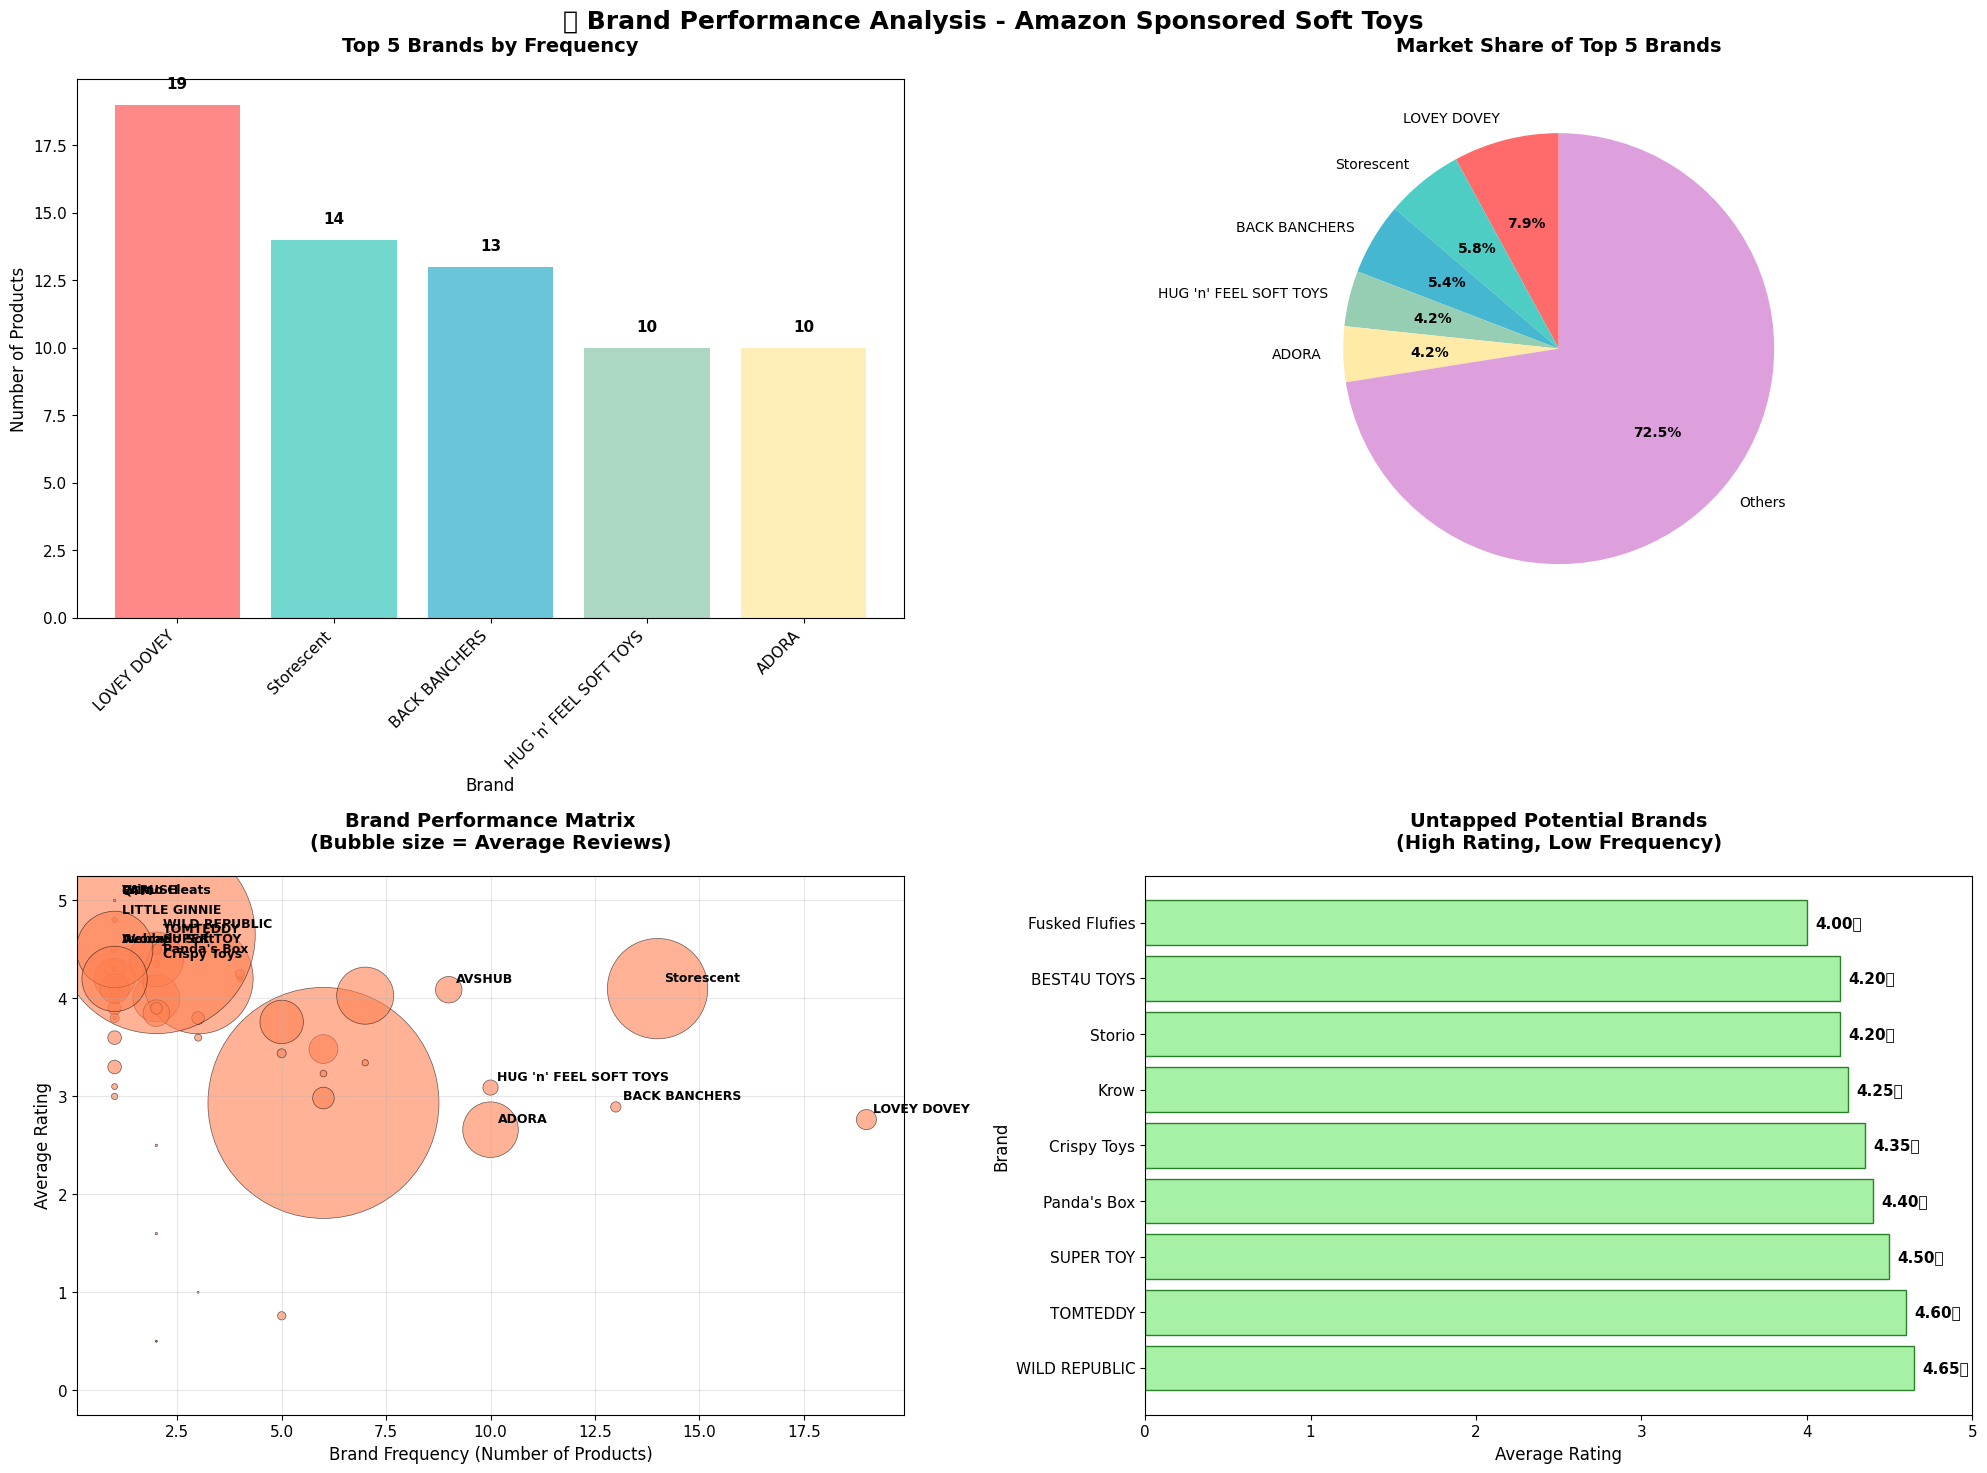

In [43]:
# Create comprehensive brand performance visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('🏷️ Brand Performance Analysis - Amazon Sponsored Soft Toys', fontsize=18, fontweight='bold', y=0.98)

# 1. Top 5 brands by frequency - Bar chart
top_5_brands = brand_counts.head(5)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
bars1 = axes[0, 0].bar(range(len(top_5_brands)), top_5_brands.values, color=colors, alpha=0.8)
axes[0, 0].set_title('Top 5 Brands by Frequency', fontsize=14, fontweight='bold', pad=20)
axes[0, 0].set_xlabel('Brand', fontsize=12)
axes[0, 0].set_ylabel('Number of Products', fontsize=12)
axes[0, 0].set_xticks(range(len(top_5_brands)))
axes[0, 0].set_xticklabels(top_5_brands.index, rotation=45, ha='right')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars1, top_5_brands.values)):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   str(value), ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Pie chart - Percentage share of top brands
others_count = brand_counts.iloc[5:].sum()
pie_data = list(top_5_brands.values) + [others_count]
pie_labels = list(top_5_brands.index) + ['Others']
pie_colors = colors + ['#DDA0DD']

wedges, texts, autotexts = axes[0, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                         startangle=90, colors=pie_colors, textprops={'fontsize': 10})
axes[0, 1].set_title('Market Share of Top 5 Brands', fontsize=14, fontweight='bold', pad=20)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_weight('bold')

# 3. Brand performance matrix (frequency vs rating)
brand_analysis = df.groupby('brand').agg({
    'rating': 'mean',
    'title': 'count',
    'reviews': 'mean'
}).rename(columns={'title': 'frequency'})

scatter = axes[1, 0].scatter(brand_analysis['frequency'], brand_analysis['rating'], 
                           s=brand_analysis['reviews']*3, alpha=0.6, c='coral', edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Brand Frequency (Number of Products)', fontsize=12)
axes[1, 0].set_ylabel('Average Rating', fontsize=12)
axes[1, 0].set_title('Brand Performance Matrix\n(Bubble size = Average Reviews)', fontsize=14, fontweight='bold', pad=20)
axes[1, 0].grid(True, alpha=0.3)

# Add annotations for key brands
for brand, data in brand_analysis.iterrows():
    if data['frequency'] > 8 or data['rating'] > 4.3:
        axes[1, 0].annotate(brand, (data['frequency'], data['rating']), 
                           xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold')

# 4. Untapped potential brands (high rating, low frequency)
if not untapped_brands.empty:
    bars2 = axes[1, 1].barh(range(len(untapped_brands)), untapped_brands['avg_rating'], 
                           color='lightgreen', alpha=0.8, edgecolor='darkgreen')
    axes[1, 1].set_title('Untapped Potential Brands\n(High Rating, Low Frequency)', fontsize=14, fontweight='bold', pad=20)
    axes[1, 1].set_xlabel('Average Rating', fontsize=12)
    axes[1, 1].set_ylabel('Brand', fontsize=12)
    axes[1, 1].set_yticks(range(len(untapped_brands)))
    axes[1, 1].set_yticklabels(untapped_brands.index)
    axes[1, 1].set_xlim(0, 5)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars2, untapped_brands['avg_rating'])):
        axes[1, 1].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                       f'{value:.2f}⭐', va='center', fontweight='bold')
else:
    axes[1, 1].text(0.5, 0.5, 'No untapped potential brands\nfound with current criteria', 
                   ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].set_title('Untapped Potential Brands', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 📊 Brand Performance Analysis – Detailed Insights

### 🔝 Top 5 Brands by Frequency

- **LOVEY DOVEY** appeared most frequently with **19 sponsored products**, leading the category in visibility.
- Followed by:
  - **Storescent** – 14 products
  - **BACK BENCHERS** – 13 products
  - **HUG 'n' FEEL SOFT TOYS** – 10 products
  - **ADORA** – 10 products
- These five brands have a strong promotional presence and are likely investing heavily in visibility.

---

### 🥧 Market Share of Top 5 Brands

- Top 5 brands contribute only **27.5%** of total listings.
  - **LOVEY DOVEY** has the highest individual share at **7.9%**.
  - The remaining **72.5%** of listings fall under "Others", highlighting a **fragmented market**.
- This suggests significant competition and **opportunities for emerging brands** to establish a presence.

---

### 📈 Brand Performance Matrix  
*(X-axis: Brand Frequency | Y-axis: Average Rating | Bubble Size: Avg Reviews)*

- **LOVEY DOVEY** had the **highest presence** but a **low average rating (~3.3)** — suggesting quantity over quality.
- **Storescent** showed a strong balance:
  - **High frequency**
  - **High average rating (~4.2)**
  - **Large review volume**
- Brands clustered in the lower-left quadrant had:
  - **Low frequency**
  - **High ratings (>4.5)**
  - **Healthy review counts**
  - These are potential **high-satisfaction brands with low exposure**.
- **ADORA** had moderate frequency but poor ratings — potentially requiring product improvement.

---

### 🌟 Untapped Potential Brands  
*(High Rating, Low Frequency)*

Brands with excellent ratings but limited exposure:

| Brand           | Avg Rating |
|----------------|-------------|
| **WILD REPUBLIC** | 4.65        |
| **TOMTEDDY**       | 4.60        |
| **SUPER TOY**      | 4.50        |
| **Panda’s Box**    | 4.40        |
| **Crispy Toys**    | 4.35        |
| **Krow**           | 4.25        |
| **Storio**         | 4.20        |
| **BEST4U TOYS**    | 4.20        |
| **Fusked Fluffies**| 4.00        |

- These brands represent **hidden gems** — high customer satisfaction with low visibility.
- Ideal for **promotion, partnerships, or deeper strategic investment**.

---

### 🧠 Strategic Takeaways

1. **Dominant but Weak**:  
   - **LOVEY DOVEY** leads in presence but suffers from low ratings — a red flag for product quality or brand perception.

2. **Balanced Performers**:  
   - **Storescent** strikes an ideal balance between frequency, rating, and reviews — a strong role model for brand performance.

3. **Growth Opportunities**:  
   - Brands with high ratings and low presence (highlighted above) could be **boosted through marketing** to gain traction.

4. **Fragmented Market**:  
   - The dominance of the "Others" category implies there’s **room for newer players** to rise with the right strategy.

---


In [44]:
print("="*80)
print("🎯 ACTIONABLE BUSINESS INSIGHTS")
print("="*80)

# Market dominance insights
market_leader = brand_counts.index[0]
quality_leader = brand_metrics.index[0]

print(f"\n📈 MARKET DOMINANCE:")
print(f"   • Market Leader: {market_leader}")
print(f"     - Commands {brand_counts.iloc[0]} products ({brand_counts.iloc[0]/len(df)*100:.1f}% market share)")
print(f"     - Average rating: {brand_metrics.loc[market_leader, 'avg_rating']:.2f}⭐")
print(f"     - Strategy: Maintain market position, focus on quality improvement")

print(f"\n⭐ QUALITY LEADERSHIP:")
print(f"   • Quality Leader: {quality_leader}")
print(f"     - Highest average rating: {brand_metrics.iloc[0]['avg_rating']:.2f}⭐")
print(f"     - Product count: {brand_metrics.loc[quality_leader, 'product_count']} products")
print(f"     - Strategy: Leverage quality reputation for market expansion")

# Untapped potential analysis
if not untapped_brands.empty:
    print(f"\n💎 UNTAPPED POTENTIAL OPPORTUNITIES:")
    for i, (brand, metrics) in enumerate(untapped_brands.head(3).iterrows(), 1):
        print(f"   {i}. {brand}")
        print(f"      - Rating: {metrics['avg_rating']:.2f}⭐ (excellent quality)")
        print(f"      - Products: {metrics['product_count']} (low market presence)")
        print(f"      - Opportunity: High-quality brand with expansion potential")

# Market concentration analysis
print(f"\n📊 MARKET CONCENTRATION ANALYSIS:")
print(f"   • Market Structure: {'Concentrated' if top_3_share > 50 else 'Fragmented'}")
print(f"   • Top 3 brands: {top_3_share:.1f}% market share")
print(f"   • Top 5 brands: {top_5_share:.1f}% market share")
print(f"   • Long tail: {df['brand'].nunique() - 5} other brands compete for remaining {100 - top_5_share:.1f}%")

# Strategic recommendations
print(f"\n🚀 STRATEGIC RECOMMENDATIONS:")
print(f"   1. PARTNERSHIP OPPORTUNITIES:")
print(f"      - Consider partnerships with {', '.join(untapped_brands.index[:3])} for quality positioning")
print(f"   2. MARKET EXPANSION:")
print(f"      - Focus on quality leaders with low frequency for growth potential")
print(f"   3. COMPETITIVE ANALYSIS:")
print(f"      - Monitor {market_leader} for market trends and pricing strategies")
print(f"   4. NICHE TARGETING:")
print(f"      - Explore high-rated, low-frequency brands for specialized markets")

# Export insights summary
insights_summary = {
    'market_leader': market_leader,
    'quality_leader': quality_leader,
    'top_3_market_share': f"{top_3_share:.1f}%",
    'top_5_market_share': f"{top_5_share:.1f}%",
    'untapped_opportunities': len(untapped_brands),
    'total_brands': df['brand'].nunique()
}

print(f"\n📋 INSIGHTS SUMMARY:")
for key, value in insights_summary.items():
    print(f"   {key.replace('_', ' ').title()}: {value}")


🎯 ACTIONABLE BUSINESS INSIGHTS

📈 MARKET DOMINANCE:
   • Market Leader: LOVEY DOVEY
     - Commands 19 products (7.9% market share)
     - Average rating: 2.76⭐
     - Strategy: Maintain market position, focus on quality improvement

⭐ QUALITY LEADERSHIP:
   • Quality Leader: QTM
     - Highest average rating: 5.00⭐
     - Product count: 1 products
     - Strategy: Leverage quality reputation for market expansion

💎 UNTAPPED POTENTIAL OPPORTUNITIES:
   1. WILD REPUBLIC
      - Rating: 4.65⭐ (excellent quality)
      - Products: 2.0 (low market presence)
      - Opportunity: High-quality brand with expansion potential
   2. TOMTEDDY
      - Rating: 4.60⭐ (excellent quality)
      - Products: 2.0 (low market presence)
      - Opportunity: High-quality brand with expansion potential
   3. SUPER TOY
      - Rating: 4.50⭐ (excellent quality)
      - Products: 2.0 (low market presence)
      - Opportunity: High-quality brand with expansion potential

📊 MARKET CONCENTRATION ANALYSIS:
   • Mar

In [45]:
# Create executive summary table
print("="*80)
print("📊 EXECUTIVE SUMMARY TABLE")
print("="*80)

# Create comprehensive brand performance table
executive_summary = df.groupby('brand').agg({
    'title': 'count',
    'rating': 'mean',
    'reviews': 'mean',
    'price': 'mean'
}).round(2)

executive_summary.columns = ['Product_Count', 'Avg_Rating', 'Avg_Reviews', 'Avg_Price']
executive_summary['Market_Share_%'] = (executive_summary['Product_Count'] / len(df) * 100).round(1)
executive_summary['Category'] = 'Standard'

# Classify brands
executive_summary.loc[executive_summary['Product_Count'] >= 10, 'Category'] = 'Market Leader'
executive_summary.loc[(executive_summary['Avg_Rating'] >= 4.0) & (executive_summary['Product_Count'] <= 5), 'Category'] = 'Untapped Potential'
executive_summary.loc[executive_summary['Avg_Rating'] >= 4.5, 'Category'] = 'Quality Leader'

# Sort by market share
executive_summary = executive_summary.sort_values('Market_Share_%', ascending=False)

print("Top 15 Brands Performance Summary:")
print(executive_summary.head(15).to_string())

# Save summary to CSV
executive_summary.to_csv('brand_performance_summary.csv')
print(f"\n✅ Executive summary saved to 'brand_performance_summary.csv'")


📊 EXECUTIVE SUMMARY TABLE
Top 15 Brands Performance Summary:
                        Product_Count  Avg_Rating  Avg_Reviews  Avg_Price  Market_Share_%       Category
brand                                                                                                   
LOVEY DOVEY                        19        2.76        69.84     716.84             7.9  Market Leader
Storescent                         14        4.10      1740.00     501.50             5.8  Market Leader
BACK BANCHERS                      13        2.89        18.38     695.54             5.4  Market Leader
ADORA                              10        2.66       533.60     523.50             4.2  Market Leader
HUG 'n' FEEL SOFT TOYS             10        3.09        40.30     799.40             4.2  Market Leader
AVSHUB                              9        4.09       121.56     593.33             3.8       Standard
VIH-AAN                             8        0.00         0.00     488.00             3.3       Sta

### 💡 Price vs. Rating Analysis

- **Objective:**  
  I aimed to determine whether higher-priced products received better customer ratings.

- **Metrics I Analyzed:**
  - **Average Price by Rating Range:** I compared the average prices of high-rated versus low-rated products to uncover pricing trends.
  - **Price-Performance Outliers:** I identified products that offered **high ratings at low prices**, indicating strong value for money.

- **Actionable Insights I Derived:**
  - I discovered several **high-value products** — items that were both affordable and highly rated, making them strong candidates for promotion.
  - I also spotted **overpriced but poorly rated products**, which are likely to underperform and may need repricing or quality improvements.

- **Visualizations I Created:**
  - A **scatter plot** to visualize the relationship between **price and rating**, helping to easily detect pricing outliers.
  - A **bar chart** to compare the **average price across different rating ranges**, providing a clear view of pricing trends by quality.


In [46]:
print("="*70)
print("💰 PRICE VS. RATING ANALYSIS")
print("="*70)

# Basic price-rating correlation
correlation = df['price'].corr(df['rating'])
print(f"Overall Price-Rating Correlation: {correlation:.3f}")
print(f"Correlation Strength: {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'}")
print(f"Correlation Direction: {'Positive' if correlation > 0 else 'Negative'}")

💰 PRICE VS. RATING ANALYSIS
Overall Price-Rating Correlation: -0.054
Correlation Strength: Weak
Correlation Direction: Negative


In [48]:
# Create rating ranges and analyze average prices
print("\n📈 AVERAGE PRICE BY RATING RANGE:")
print("-" * 50)

# Define rating ranges
df['rating_range'] = pd.cut(df['rating'], 
                           bins=[0, 2, 3, 4, 5], 
                           labels=['0-2 stars', '2-3 stars', '3-4 stars', '4-5 stars'])

# Calculate average price by rating range
price_by_rating = df.groupby('rating_range').agg({
    'price': ['mean', 'count', 'std'],
    'rating': 'mean'
}).round(2)

price_by_rating.columns = ['avg_price', 'product_count', 'price_std', 'avg_rating']

# Display results
for rating_range, metrics in price_by_rating.iterrows():
    print(f"   {rating_range:<12} : ₹{metrics['avg_price']:,.2f} avg | {metrics['product_count']:3f} products | ±₹{metrics['price_std']:,.2f} std")

# Additional analysis by specific rating bins
print(f"\n📊 DETAILED RATING ANALYSIS:")
rating_bins = pd.cut(df['rating'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
detailed_price_analysis = df.groupby(rating_bins)['price'].agg(['mean', 'count']).round(2)

for rating_bin, data in detailed_price_analysis.iterrows():
    if data['count'] > 0:
        print(f"   {rating_bin} stars: ₹{data['mean']:,.2f} avg ({data['count']} products)")



📈 AVERAGE PRICE BY RATING RANGE:
--------------------------------------------------
   0-2 stars    : ₹554.50 avg | 8.000000 products | ±₹292.14 std
   2-3 stars    : ₹531.06 avg | 16.000000 products | ±₹176.39 std
   3-4 stars    : ₹660.57 avg | 63.000000 products | ±₹333.94 std
   4-5 stars    : ₹657.01 avg | 83.000000 products | ±₹402.29 std

📊 DETAILED RATING ANALYSIS:
   0-1 stars: ₹438.60 avg (5.0 products)
   1-2 stars: ₹747.67 avg (3.0 products)
   2-3 stars: ₹531.06 avg (16.0 products)
   3-4 stars: ₹660.57 avg (63.0 products)
   4-5 stars: ₹657.01 avg (83.0 products)


In [49]:
# Identify high-value products (high rating, low price)
print("\n💎 HIGH-VALUE PRODUCTS (Good Value for Money):")
print("-" * 60)

# Define criteria for high-value products
high_rating_threshold = 4.0
low_price_threshold = df['price'].quantile(0.25)  # Bottom 25% of prices

high_value_products = df[
    (df['rating'] >= high_rating_threshold) & 
    (df['price'] <= low_price_threshold)
].sort_values('rating', ascending=False)

print(f"Criteria: Rating ≥ {high_rating_threshold}⭐ AND Price ≤ ₹{low_price_threshold:.0f}")
print(f"Found {len(high_value_products)} high-value products")

if not high_value_products.empty:
    print(f"\nTop 10 High-Value Products:")
    for i, (_, product) in enumerate(high_value_products.head(10).iterrows(), 1):
        print(f"   {i:2d}. {product['title'][:40]}...")
        print(f"       Brand: {product['brand']:<15} | ₹{product['price']:4d} | {product['rating']:.1f}⭐ | {product['reviews']} reviews")

# Calculate value score for better ranking
df['value_score'] = df['rating'] / (df['price'] / 100)  # Rating per ₹100
best_value_products = df.nlargest(5, 'value_score')

print(f"\n🏆 BEST VALUE PRODUCTS (by Value Score):")
for i, (_, product) in enumerate(best_value_products.iterrows(), 1):
    print(f"   {i}. {product['title'][:40]}...")
    print(f"      Value Score: {product['value_score']:.2f} | ₹{product['price']} | {product['rating']:.1f}⭐")



💎 HIGH-VALUE PRODUCTS (Good Value for Money):
------------------------------------------------------------
Criteria: Rating ≥ 4.0⭐ AND Price ≤ ₹399
Found 29 high-value products

Top 10 High-Value Products:
    1. Cute White Bunny Soft Toy with Carrot | ...
       Brand: ADORA           | ₹ 188 | 5.0⭐ | 2 reviews
    2. Crispy Toys-Bunny Cap Soft Toy for Girl'...
       Brand: Crispy Toys     | ₹ 349 | 5.0⭐ | 3 reviews
    3. QTM Couple Love Teddy Bears in Heart Bas...
       Brand: QTM             | ₹ 275 | 5.0⭐ | 1 reviews
    4. VARUSH Stuffed Soft Teddy Bear Toy for B...
       Brand: VARUSH          | ₹ 399 | 5.0⭐ | 1 reviews
    5. Krow Soft Toys Long Soft Lovable Huggabl...
       Brand: Krow            | ₹ 399 | 5.0⭐ | 1 reviews
    6. TOMTEDDY Plush Stuffed Cute Blue Foil An...
       Brand: TOMTEDDY        | ₹ 299 | 4.6⭐ | 4 reviews
    7. TOMTEDDY Plush Stuffed Cute Blue Foil An...
       Brand: TOMTEDDY        | ₹ 299 | 4.6⭐ | 4 reviews
    8. Amazon Brand - Jam & Honey Din

In [51]:
# Identify overpriced but poorly rated products
print("\n⚠️  OVERPRICED BUT POORLY RATED PRODUCTS:")
print("-" * 60)

# Define criteria for overpriced products
high_price_threshold = df['price'].quantile(0.75)  # Top 25% of prices
low_rating_threshold = 2.5

overpriced_products = df[
    (df['price'] >= high_price_threshold) & (df['rating'] > 0) &
    (df['rating'] <= low_rating_threshold)
].sort_values('price', ascending=False)

print(f"Criteria: Price ≥ ₹{high_price_threshold:.0f} AND Rating ≤ {low_rating_threshold}⭐")
print(f"Found {len(overpriced_products)} potentially overpriced products")

if not overpriced_products.empty:
    print(f"\nTop 10 Overpriced Products:")
    for i, (_, product) in enumerate(overpriced_products.head(10).iterrows(), 1):
        print(f"   {i:2d}. {product['title'][:40]}...")
        print(f"       Brand: {product['brand']:<15} | ₹{product['price']:4d} | {product['rating']:.1f}⭐ | {product['reviews']} reviews")

# Products with high price but zero/low ratings
zero_rating_expensive = df[(df['rating'] == 0) & (df['price'] > df['price'].median())]
print(f"\n🚨 EXPENSIVE PRODUCTS WITH NO RATINGS: {len(zero_rating_expensive)}")



⚠️  OVERPRICED BUT POORLY RATED PRODUCTS:
------------------------------------------------------------
Criteria: Price ≥ ₹799 AND Rating ≤ 2.5⭐
Found 2 potentially overpriced products

Top 10 Overpriced Products:
    1. SHAPZE Pawsome Puppies, Plush/Soft, Hugg...
       Brand: SHAPZE          | ₹1199 | 2.0⭐ | 1 reviews
    2. Vaishno Unicorn Soft Toy for Kids Animal...
       Brand: Vaishno         | ₹ 799 | 2.5⭐ | 12 reviews

🚨 EXPENSIVE PRODUCTS WITH NO RATINGS: 36


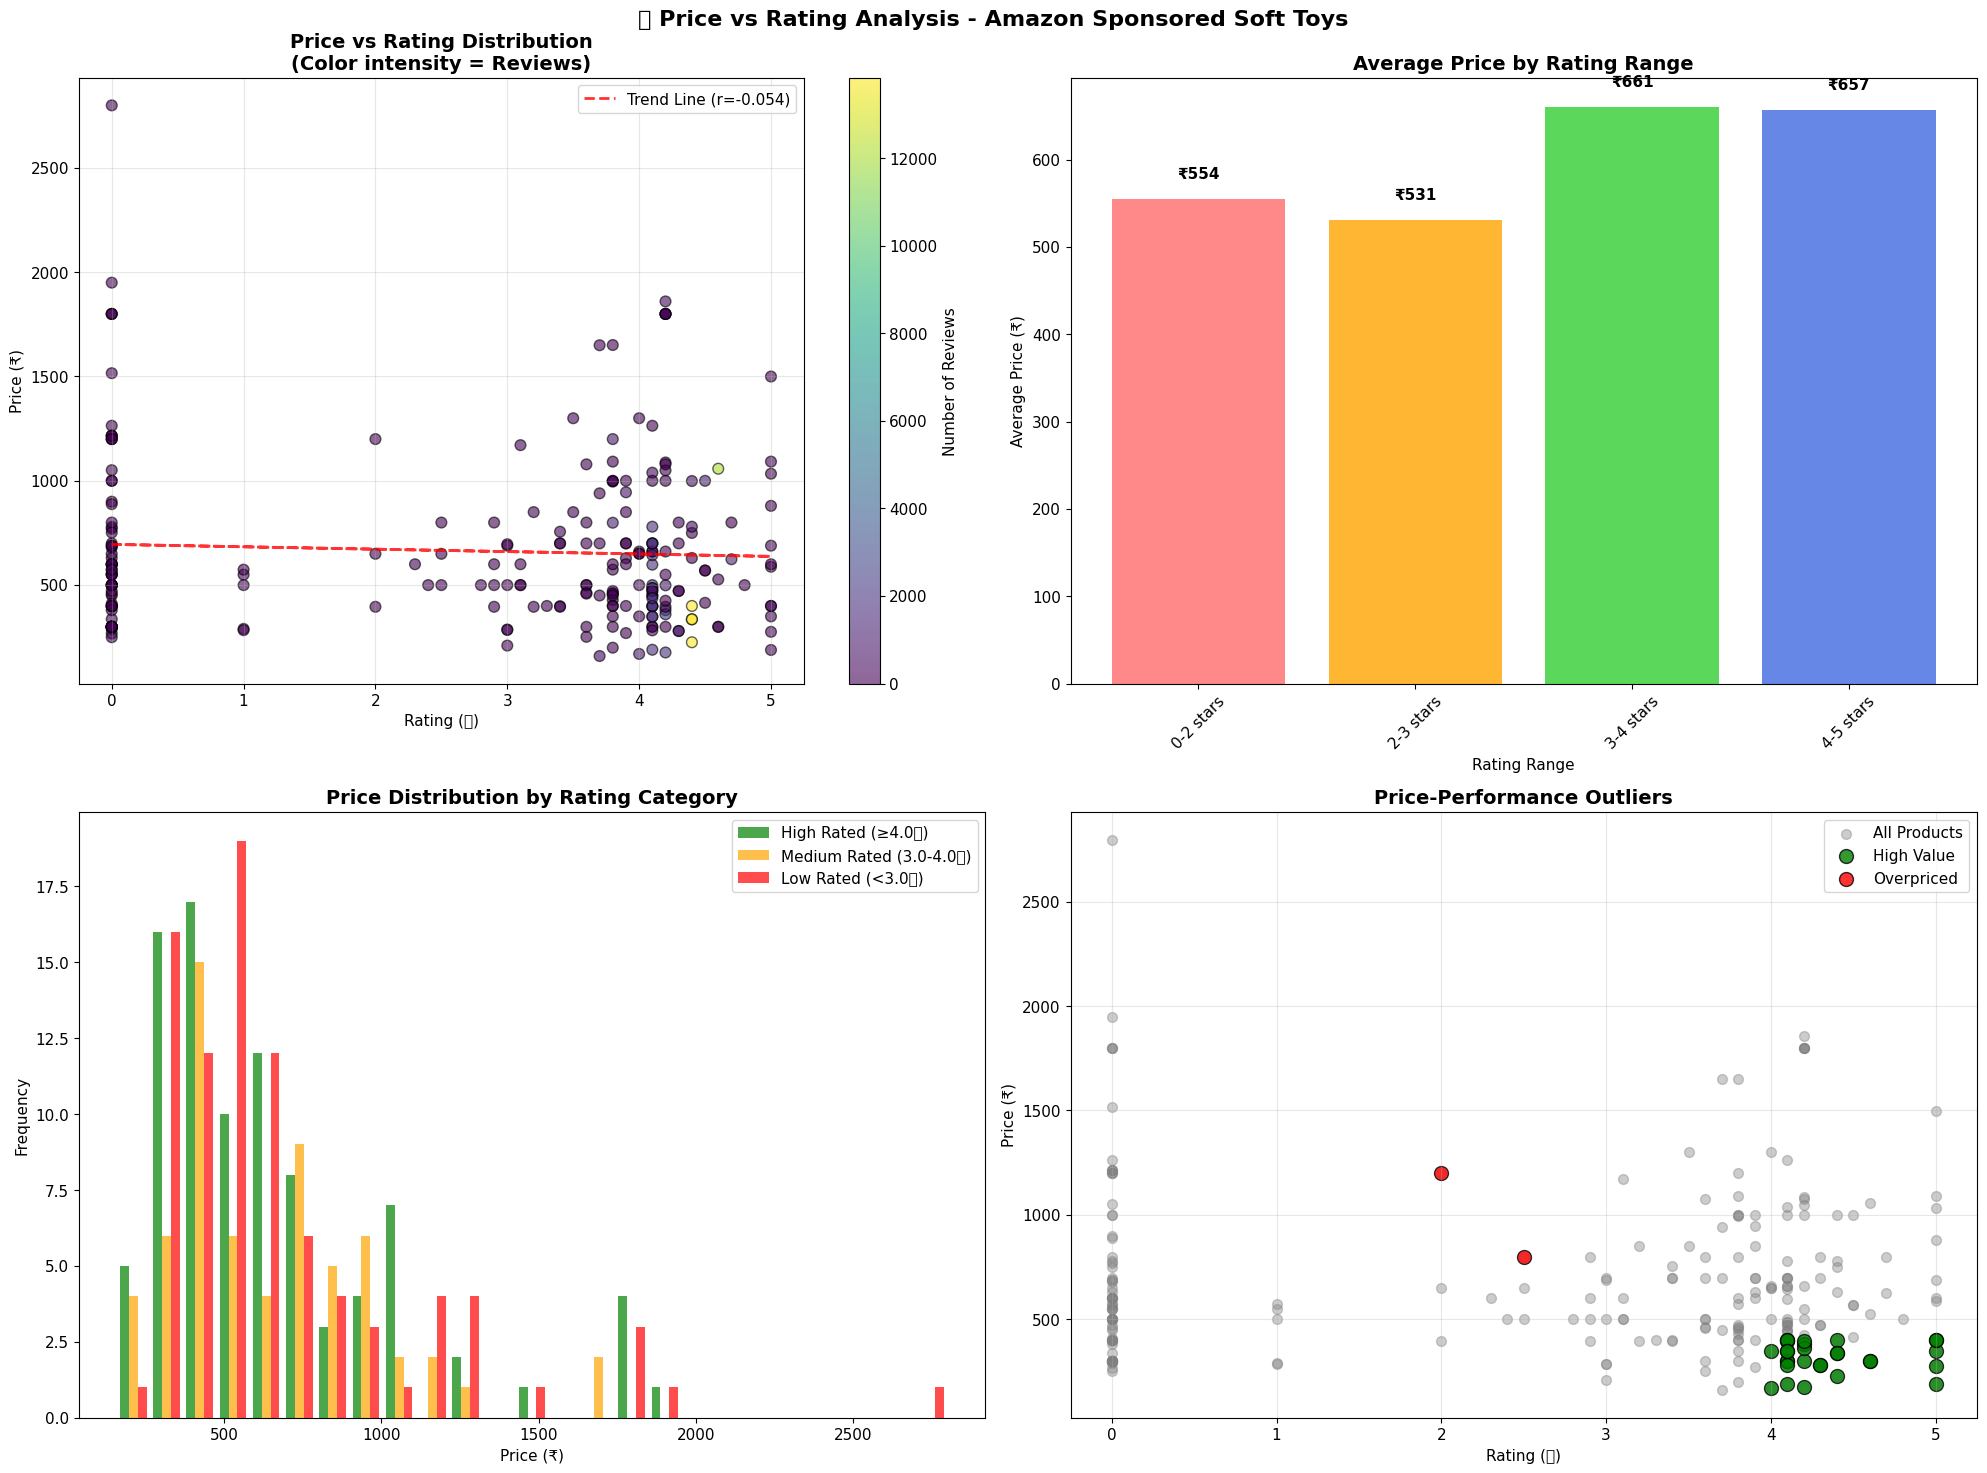

In [56]:
# Create comprehensive Price vs Rating visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('💰 Price vs Rating Analysis - Amazon Sponsored Soft Toys', fontsize=16, fontweight='bold')

# 1. Scatter plot: Price vs Rating
scatter = axes[0, 0].scatter(df['rating'], df['price'], 
                           alpha=0.6, s=60, c=df['reviews'], cmap='viridis', edgecolors='black')
axes[0, 0].set_xlabel('Rating (⭐)')
axes[0, 0].set_ylabel('Price (₹)')
axes[0, 0].set_title('Price vs Rating Distribution\n(Color intensity = Reviews)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['rating'], df['price'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['rating'], p(df['rating']), "r--", alpha=0.8, linewidth=2, label=f'Trend Line (r={correlation:.3f})')
axes[0, 0].legend()

# Add colorbar
plt.colorbar(scatter, ax=axes[0, 0], label='Number of Reviews')

# 2. Average price by rating range - Bar chart
bars1 = axes[0, 1].bar(range(len(price_by_rating)), price_by_rating['avg_price'], 
                      color=['#FF6B6B', '#FFA500', '#32CD32', '#4169E1'], alpha=0.8)
axes[0, 1].set_title('Average Price by Rating Range', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rating Range')
axes[0, 1].set_ylabel('Average Price (₹)')
axes[0, 1].set_xticks(range(len(price_by_rating)))
axes[0, 1].set_xticklabels(price_by_rating.index, rotation=45)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars1, price_by_rating['avg_price'])):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
                   f'₹{value:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Price distribution by rating category
high_rated = df[df['rating'] >= 4.0]['price']
medium_rated = df[(df['rating'] >= 3.0) & (df['rating'] < 4.0)]['price']
low_rated = df[df['rating'] < 3.0]['price']

axes[1, 0].hist([high_rated, medium_rated, low_rated], bins=25, alpha=0.7, 
               label=['High Rated (≥4.0⭐)', 'Medium Rated (3.0-4.0⭐)', 'Low Rated (<3.0⭐)'], 
               color=['green', 'orange', 'red'])
axes[1, 0].set_title('Price Distribution by Rating Category', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Price (₹)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 4. Value score analysis (outlier identification)
# Highlight high-value and overpriced products
axes[1, 1].scatter(df['rating'], df['price'], alpha=0.4, s=50, c='gray', label='All Products')

# Highlight high-value products
if not high_value_products.empty:
    axes[1, 1].scatter(high_value_products['rating'], high_value_products['price'], 
                      s=100, c='green', alpha=0.8, label='High Value', edgecolors='black')

# Highlight overpriced products
if not overpriced_products.empty:
    axes[1, 1].scatter(overpriced_products['rating'], overpriced_products['price'], 
                      s=100, c='red', alpha=0.8, label='Overpriced', edgecolors='black')

axes[1, 1].set_xlabel('Rating (⭐)')
axes[1, 1].set_ylabel('Price (₹)')
axes[1, 1].set_title('Price-Performance Outliers', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 💸 Price vs Rating Analysis – Detailed Insights

### 📈 Price vs Rating Distribution (Top-Left Scatter Plot)

- The scatter plot shows **no strong correlation** between price and rating (**r = -0.054**), indicating that **higher price doesn't guarantee better ratings**.
- Most products, regardless of rating, are priced between ₹200 and ₹800.
- **Color intensity** represents the number of reviews — some lower-priced and mid-rated products received **very high review volumes**, suggesting strong value perception.
- A few **high-priced outliers** exist even with low ratings, pointing to potential **overpriced listings**.

---

### 📊 Average Price by Rating Range (Top-Right Bar Chart)

| Rating Range    | Avg Price (₹) |
|-----------------|---------------|
| 0–2 stars       | ₹554          |
| 2–3 stars       | ₹531          |
| 3–4 stars       | ₹661          |
| 4–5 stars       | ₹657          |

- Products rated **3–5 stars** tend to have **higher average prices**, indicating customers are **willing to pay more** for better-rated products.
- The lowest average price is seen in the **2–3 star range**, suggesting possible pricing adjustments by sellers to compensate for average product perception.
- Interestingly, products with **0–2 stars** have a slightly **higher average price than the 2–3 star range**, possibly indicating misaligned pricing for poorly performing items.

---

### 📉 Price Distribution by Rating Category (Bottom-Left Histogram)

- **High-rated products (≥4.0)** are spread across a **wider price range**, especially in the ₹400–₹900 bracket.
- **Low-rated products (<3.0)** are also present across the spectrum, including high-price segments, suggesting some **overpriced, underperforming listings**.
- **Medium-rated products (3.0–4.0)** mostly cluster in the **₹300–₹700 range**, which might represent the price-performance sweet spot.

---

### 🔍 Price-Performance Outliers (Bottom-Right Scatter Plot)

- **Green dots** represent **"high-value" products** — highly rated and affordably priced. These products stand out as the **best deals** for customers.
- **Red dots** indicate **overpriced products** — lower ratings despite high prices. These are potential **strategic risks** or mispriced items.
- Majority of products are neutral (gray), but a **clear opportunity exists to promote the high-value (green) items** and reconsider pricing for red outliers.

---

### 🧠 Strategic Takeaways

1. **No Strong Price-Rating Link**:  
   - Price doesn’t guarantee quality. Sellers must **back higher prices with real customer satisfaction**.

2. **Sweet Spot Exists**:  
   - Mid-range pricing (~₹500–₹700) appears to balance good ratings and volume well.

3. **High-Value Products Identified**:  
   - Products in the green zone (high rating + low price) are **ideal for promotion**, bundling, or featuring.

4. **Red Flags (Overpriced Listings)**:  
   - Products with low ratings and high prices should be **investigated or repositioned** in the market.

5. **Review Volume Matters**:  
   - Even mid-priced products attract high reviews if positioned well, reinforcing the importance of **value perception over premium pricing**.

---


In [57]:
print("="*80)
print("🎯 ACTIONABLE INSIGHTS - PRICE VS. RATING ANALYSIS")
print("="*80)

# Price-Rating Relationship Analysis
print(f"\n📈 PRICE-RATING RELATIONSHIP:")
print(f"   • Correlation Coefficient: {correlation:.3f}")
print(f"   • Relationship: {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'} {('Positive' if correlation > 0 else 'Negative')}")

if correlation > 0:
    print(f"   • Interpretation: Higher prices tend to have slightly higher ratings")
else:
    print(f"   • Interpretation: Higher prices do not guarantee better ratings")

# Price Range Analysis
best_value_range = price_by_rating.loc[price_by_rating['avg_rating'].idxmax()]
print(f"\n💰 PRICE RANGE INSIGHTS:")
print(f"   • Best Value Range: {best_value_range.name}")
print(f"   • Average Price: ₹{best_value_range['avg_price']:.2f}")
print(f"   • Average Rating: {best_value_range['avg_rating']:.2f}⭐")

# Market Opportunities
print(f"\n🎯 MARKET OPPORTUNITIES:")
print(f"   • High-Value Products: {len(high_value_products)} products offer excellent value")
print(f"   • Overpriced Products: {len(overpriced_products)} products may be overpriced")
print(f"   • Market Gap: Opportunity for quality products in ₹{low_price_threshold:.0f}-₹{high_price_threshold:.0f} range")

# Consumer Recommendations
print(f"\n🛍️ CONSUMER RECOMMENDATIONS:")
print(f"   • Best Value Strategy: Focus on products with rating ≥4.0⭐ and price ≤₹{low_price_threshold:.0f}")
print(f"   • Avoid: Products with price >₹{high_price_threshold:.0f} and rating <{low_rating_threshold}⭐")
print(f"   • Sweet Spot: {best_value_range.name} range offers best rating-to-price ratio")

# Business Recommendations
print(f"\n🏢 BUSINESS RECOMMENDATIONS:")
print(f"   • Pricing Strategy: Quality products (4-5⭐) can support premium pricing")
print(f"   • Competitive Opportunity: Address overpriced segment with better value alternatives")
print(f"   • Market Position: Focus on {best_value_range.name} segment for optimal performance")

# Statistical Summary
print(f"\n📊 STATISTICAL SUMMARY:")
print(f"   • Price Range: ₹{df['price'].min()} - ₹{df['price'].max()}")
print(f"   • Average Price: ₹{df['price'].mean():.2f}")
print(f"   • Median Price: ₹{df['price'].median():.2f}")
print(f"   • Rating Range: {df['rating'].min():.1f}⭐ - {df['rating'].max():.1f}⭐")
print(f"   • Average Rating: {df['rating'].mean():.2f}⭐")


🎯 ACTIONABLE INSIGHTS - PRICE VS. RATING ANALYSIS

📈 PRICE-RATING RELATIONSHIP:
   • Correlation Coefficient: -0.054
   • Relationship: Weak Negative
   • Interpretation: Higher prices do not guarantee better ratings

💰 PRICE RANGE INSIGHTS:
   • Best Value Range: 4-5 stars
   • Average Price: ₹657.01
   • Average Rating: 4.36⭐

🎯 MARKET OPPORTUNITIES:
   • High-Value Products: 29 products offer excellent value
   • Overpriced Products: 2 products may be overpriced
   • Market Gap: Opportunity for quality products in ₹399-₹799 range

🛍️ CONSUMER RECOMMENDATIONS:
   • Best Value Strategy: Focus on products with rating ≥4.0⭐ and price ≤₹399
   • Avoid: Products with price >₹799 and rating <2.5⭐
   • Sweet Spot: 4-5 stars range offers best rating-to-price ratio

🏢 BUSINESS RECOMMENDATIONS:
   • Pricing Strategy: Quality products (4-5⭐) can support premium pricing
   • Competitive Opportunity: Address overpriced segment with better value alternatives
   • Market Position: Focus on 4-5 star

In [58]:
print("="*70)
print("📝 REVIEW & RATING DISTRIBUTION ANALYSIS")
print("="*70)

# Basic statistics
print(f"Dataset Overview:")
print(f"   • Total Products: {len(df)}")
print(f"   • Products with Reviews: {len(df[df['reviews'] > 0])}")
print(f"   • Products with Ratings: {len(df[df['rating'] > 0])}")
print(f"   • Average Reviews: {df['reviews'].mean():.0f}")
print(f"   • Average Rating: {df['rating'].mean():.2f}⭐")

📝 REVIEW & RATING DISTRIBUTION ANALYSIS
Dataset Overview:
   • Total Products: 240
   • Products with Reviews: 170
   • Products with Ratings: 170
   • Average Reviews: 499
   • Average Rating: 2.71⭐


### ⭐ 3. Review & Rating Distribution

- **Objective:**  
  I aimed to identify the most popular and trusted products in the dataset.

- **Metrics I Analyzed:**
  - **Top 5 Products by Reviews:** I highlighted the products that received the highest number of customer reviews, indicating popularity.
  - **Top 5 Products by Rating:** I showcased the products with the highest average ratings, reflecting customer satisfaction.

- **Actionable Insights I Derived:**
  - I was able to pinpoint the **best sellers** — products that had both high review counts and strong ratings.
  - I also discovered **highly rated but less-reviewed products**, which may benefit from increased visibility or promotion.

- **Visualizations I Created:**
  - A **bar chart** showing the **top-rated products** to emphasize quality.
  - A **bar chart** displaying the **most-reviewed products** to emphasize popularity.


In [63]:
# Top 5 Products by Reviews (Most Popular)
print("\n👥 TOP 5 MOST REVIEWED PRODUCTS (MOST POPULAR):")
print("-" * 60)

top_reviewed = df.nlargest(5, 'reviews')
print(f"These products have the highest customer engagement:")

for i, (_, product) in enumerate(top_reviewed.iterrows(), 1):
    print(f"\n   {i}. {product['title'][:20]}...")
    print(f"      Brand: {product['brand']}")
    print(f"      Reviews: {product['reviews']:,} reviews")
    print(f"      Rating: {product['rating']:.1f}⭐")
    print(f"      Price: ₹{product['price']:,}")

# Additional statistics for top reviewed products
print(f"\n📊 TOP REVIEWED PRODUCTS STATISTICS:")
print(f"   • Total Reviews: {top_reviewed['reviews'].sum():,}")
print(f"   • Average Rating: {top_reviewed['rating'].mean():.2f}⭐")
print(f"   • Price Range: ₹{top_reviewed['price'].min():,} - ₹{top_reviewed['price'].max():,}")



👥 TOP 5 MOST REVIEWED PRODUCTS (MOST POPULAR):
------------------------------------------------------------
These products have the highest customer engagement:

   1. Amazon Brand - Jam &...
      Brand: Amazon Brand
      Reviews: 13,833 reviews
      Rating: 4.4⭐
      Price: ₹225

   2. Amazon Brand - Jam &...
      Brand: Amazon Brand
      Reviews: 13,833 reviews
      Rating: 4.4⭐
      Price: ₹335

   3. Amazon Brand - Jam &...
      Brand: Amazon Brand
      Reviews: 13,833 reviews
      Rating: 4.4⭐
      Price: ₹399

   4. Amazon Brand - Jam &...
      Brand: Amazon Brand
      Reviews: 13,833 reviews
      Rating: 4.4⭐
      Price: ₹335

   5. Wild Republic Cuddle...
      Brand: WILD REPUBLIC
      Reviews: 12,062 reviews
      Rating: 4.6⭐
      Price: ₹1,057

📊 TOP REVIEWED PRODUCTS STATISTICS:
   • Total Reviews: 67,394
   • Average Rating: 4.44⭐
   • Price Range: ₹225 - ₹1,057


In [64]:
# Top 5 Products by Rating (Highest Quality) - with minimum reviews for reliability
print("\n⭐ TOP 5 HIGHEST RATED PRODUCTS (HIGHEST QUALITY):")
print("-" * 60)

# Filter products with minimum 10 reviews for reliability
min_reviews = 10
reliable_products = df[df['reviews'] >= min_reviews]
top_rated = reliable_products.nlargest(5, 'rating')

print(f"Criteria: Minimum {min_reviews} reviews for reliability")
print(f"These products have the highest customer satisfaction:")

for i, (_, product) in enumerate(top_rated.iterrows(), 1):
    print(f"\n   {i}. {product['title'][:50]}...")
    print(f"      Brand: {product['brand']}")
    print(f"      Rating: {product['rating']:.1f}⭐")
    print(f"      Reviews: {product['reviews']:,} reviews")
    print(f"      Price: ₹{product['price']:,}")
    print(f"      Quality Score: {product['rating'] * (1 + np.log(product['reviews'])):.2f}")

# Additional statistics for top rated products
print(f"\n📊 TOP RATED PRODUCTS STATISTICS:")
print(f"   • Average Rating: {top_rated['rating'].mean():.2f}⭐")
print(f"   • Total Reviews: {top_rated['reviews'].sum():,}")
print(f"   • Price Range: ₹{top_rated['price'].min():,} - ₹{top_rated['price'].max():,}")



⭐ TOP 5 HIGHEST RATED PRODUCTS (HIGHEST QUALITY):
------------------------------------------------------------
Criteria: Minimum 10 reviews for reliability
These products have the highest customer satisfaction:

   1. Wild Republic Beaver Plush, Stuffed Animal, Plush ...
      Brand: WILD REPUBLIC
      Rating: 4.7⭐
      Reviews: 1,450 reviews
      Price: ₹623
      Quality Score: 38.91

   2. ADORA Baby Plushies - 25 cm Blue Lovable Huggable ...
      Brand: ADORA
      Rating: 4.6⭐
      Reviews: 110 reviews
      Price: ₹526
      Quality Score: 26.22

   3. Wild Republic Cuddlekin Three Toed Sloth Plush (12...
      Brand: WILD REPUBLIC
      Rating: 4.6⭐
      Reviews: 12,062 reviews
      Price: ₹1,057
      Quality Score: 47.83

   4. Webby Combo of 2 Plush (Husky Dog and Brown Panda)...
      Brand: Webby
      Rating: 4.5⭐
      Reviews: 1,012 reviews
      Price: ₹999
      Quality Score: 35.64

   5. SUPER TOY Breathing Teddy Bear Soft Toy Huggable S...
      Brand: SUPER

In [66]:
# Best Sellers (High Reviews + Good Ratings)
print("\n🏆 BEST SELLERS (HIGH REVIEWS + GOOD RATINGS):")
print("-" * 60)

# Criteria: High reviews (top 25%) AND good ratings (>=4.0)
high_reviews_threshold = df['reviews'].quantile(0.90)
good_rating_threshold = 4.0

best_sellers = df[
    (df['reviews'] >= high_reviews_threshold) & 
    (df['rating'] >= good_rating_threshold)
].sort_values('reviews', ascending=False)

print(f"Criteria: Reviews ≥ {high_reviews_threshold:.0f} AND Rating ≥ {good_rating_threshold}⭐")
print(f"Found {len(best_sellers)} best sellers")

if not best_sellers.empty:
    print(f"\nBest Sellers List:")
    for i, (_, product) in enumerate(best_sellers.iterrows(), 1):
        print(f"\n   {i}. {product['title'][:50]}...")
        print(f"      Brand: {product['brand']}")
        print(f"      Reviews: {product['reviews']:,} | Rating: {product['rating']:.1f}⭐ | Price: ₹{product['price']:,}")
        print(f"      Success Score: {(product['reviews'] * product['rating']):.0f}")
else:
    print("   No products meet the best seller criteria")



🏆 BEST SELLERS (HIGH REVIEWS + GOOD RATINGS):
------------------------------------------------------------
Criteria: Reviews ≥ 1740 AND Rating ≥ 4.0⭐
Found 25 best sellers

Best Sellers List:

   1. Amazon Brand - Jam & Honey Dinosaur, Cute, Plush/S...
      Brand: Amazon Brand
      Reviews: 13,833 | Rating: 4.4⭐ | Price: ₹225
      Success Score: 60865

   2. Amazon Brand - Jam & Honey Teddy Bear, Cute, Soft ...
      Brand: Amazon Brand
      Reviews: 13,833 | Rating: 4.4⭐ | Price: ₹335
      Success Score: 60865

   3. Amazon Brand - Jam & Honey Teddy Bear Soft Toy (33...
      Brand: Amazon Brand
      Reviews: 13,833 | Rating: 4.4⭐ | Price: ₹335
      Success Score: 60865

   4. Amazon Brand - Jam & Honey Reversible Carrot Straw...
      Brand: Amazon Brand
      Reviews: 13,833 | Rating: 4.4⭐ | Price: ₹399
      Success Score: 60865

   5. Wild Republic Cuddlekin Three Toed Sloth Plush (12...
      Brand: WILD REPUBLIC
      Reviews: 12,062 | Rating: 4.6⭐ | Price: ₹1,057
      

In [67]:
# Hidden Gems (Highly Rated but Less-Reviewed Products)
print("\n💎 HIDDEN GEMS (HIGHLY RATED BUT LESS-REVIEWED):")
print("-" * 60)

# Criteria: High ratings (>=4.5) AND low reviews (bottom 50%) but >0 reviews
high_rating_threshold = 4.5
low_reviews_threshold = df[df['reviews'] > 0]['reviews'].quantile(0.5)

hidden_gems = df[
    (df['rating'] >= high_rating_threshold) & 
    (df['reviews'] > 0) & 
    (df['reviews'] <= low_reviews_threshold)
].sort_values('rating', ascending=False)

print(f"Criteria: Rating ≥ {high_rating_threshold}⭐ AND Reviews ≤ {low_reviews_threshold:.0f}")
print(f"Found {len(hidden_gems)} hidden gems")

if not hidden_gems.empty:
    print(f"\nHidden Gems with Promotion Potential:")
    for i, (_, product) in enumerate(hidden_gems.head(10).iterrows(), 1):
        print(f"\n   {i}. {product['title'][:50]}...")
        print(f"      Brand: {product['brand']}")
        print(f"      Rating: {product['rating']:.1f}⭐ | Reviews: {product['reviews']} | Price: ₹{product['price']:,}")
        print(f"      Potential Score: {product['rating'] * 100:.0f} (High rating, low visibility)")
else:
    print("   No hidden gems found with current criteria")



💎 HIDDEN GEMS (HIGHLY RATED BUT LESS-REVIEWED):
------------------------------------------------------------
Criteria: Rating ≥ 4.5⭐ AND Reviews ≤ 32
Found 19 hidden gems

Hidden Gems with Promotion Potential:

   1. Primo Cleats Cute Grey Batman Plush Toy for Kids, ...
      Brand: Primo Cleats
      Rating: 5.0⭐ | Reviews: 1 | Price: ₹587
      Potential Score: 500 (High rating, low visibility)

   2. Cute White Bunny Soft Toy with Carrot | Fluffy Rab...
      Brand: ADORA
      Rating: 5.0⭐ | Reviews: 2 | Price: ₹188
      Potential Score: 500 (High rating, low visibility)

   3. LOVEY DOVEY – Capybara 45cm Soft Toy Plush Toy | S...
      Brand: LOVEY DOVEY
      Rating: 5.0⭐ | Reviews: 1 | Price: ₹1,033
      Potential Score: 500 (High rating, low visibility)

   4. Crispy Toys-Bunny Cap Soft Toy for Girl's Boy's & ...
      Brand: Crispy Toys
      Rating: 5.0⭐ | Reviews: 3 | Price: ₹349
      Potential Score: 500 (High rating, low visibility)

   5. Asmita Enterprise Soft Toy Ba

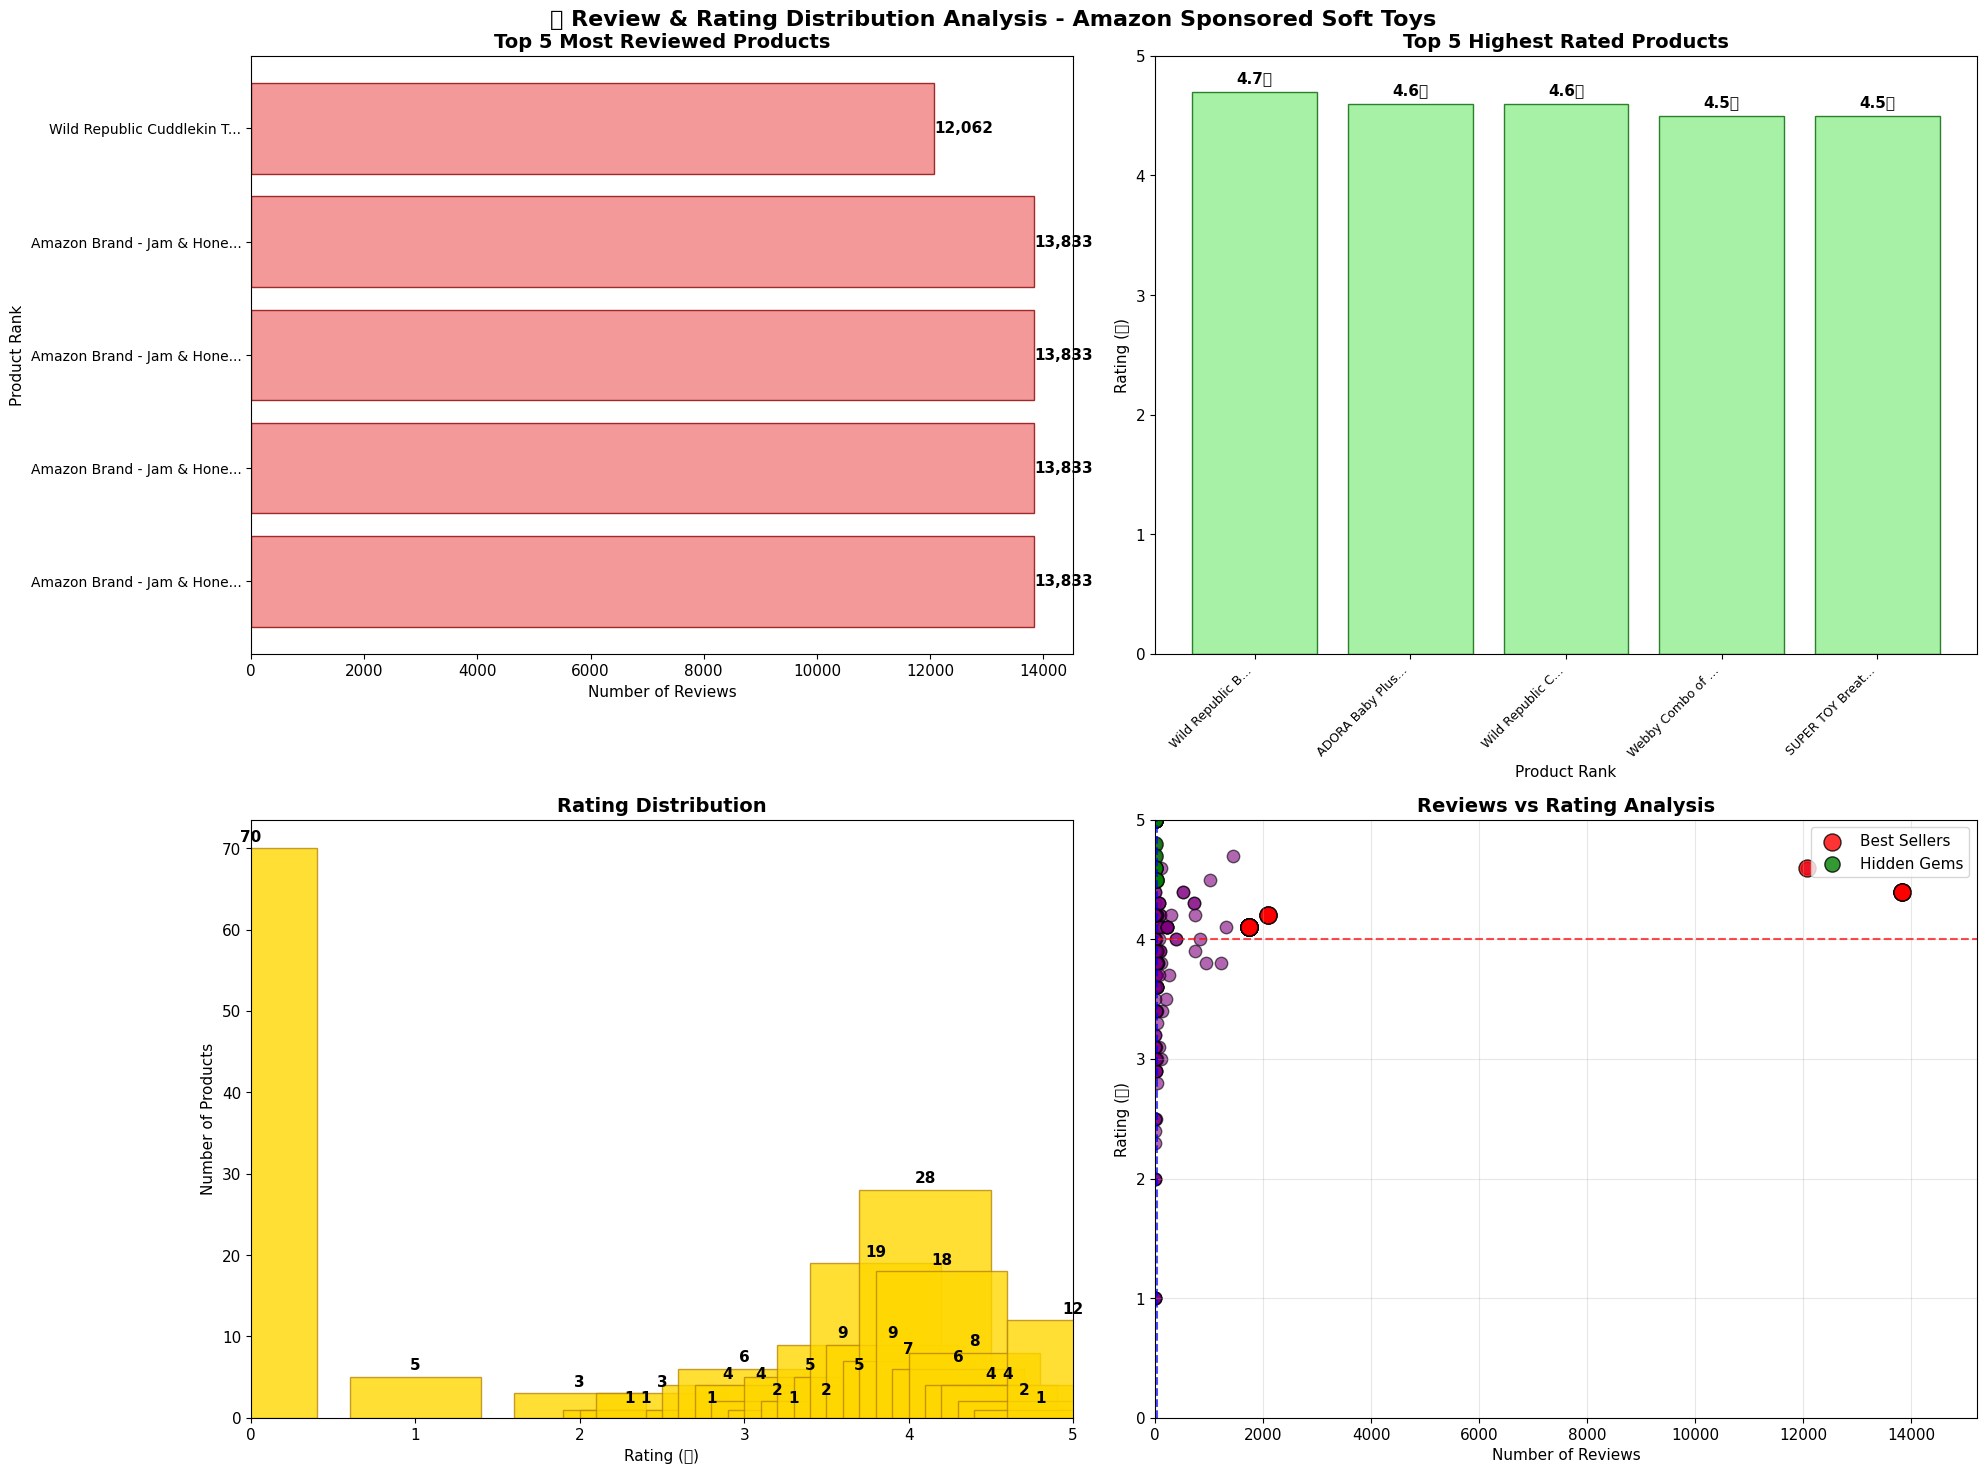

In [69]:
# Create comprehensive Review & Rating Distribution visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('📝 Review & Rating Distribution Analysis - Amazon Sponsored Soft Toys', fontsize=16, fontweight='bold')

# 1. Top 5 Most Reviewed Products - Bar chart
bars1 = axes[0, 0].barh(range(len(top_reviewed)), top_reviewed['reviews'], 
                       color='lightcoral', alpha=0.8, edgecolor='darkred')
axes[0, 0].set_title('Top 5 Most Reviewed Products', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Reviews')
axes[0, 0].set_ylabel('Product Rank')
axes[0, 0].set_yticks(range(len(top_reviewed)))
axes[0, 0].set_yticklabels([f"{title[:25]}..." for title in top_reviewed['title']], fontsize=10)

# Add value labels
for i, (bar, value) in enumerate(zip(bars1, top_reviewed['reviews'])):
    axes[0, 0].text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, 
                   f'{value:,}', va='center', fontweight='bold')

# 2. Top 5 Highest Rated Products - Bar chart
bars2 = axes[0, 1].bar(range(len(top_rated)), top_rated['rating'], 
                      color='lightgreen', alpha=0.8, edgecolor='darkgreen')
axes[0, 1].set_title('Top 5 Highest Rated Products', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Product Rank')
axes[0, 1].set_ylabel('Rating (⭐)')
axes[0, 1].set_ylim(0, 5)
axes[0, 1].set_xticks(range(len(top_rated)))
axes[0, 1].set_xticklabels([f"{title[:15]}..." for title in top_rated['title']], 
                          rotation=45, ha='right', fontsize=9)

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, top_rated['rating'])):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                   f'{value:.1f}⭐', ha='center', va='bottom', fontweight='bold')

# 3. Rating Distribution
rating_counts = df['rating'].value_counts().sort_index()
bars3 = axes[1, 0].bar(rating_counts.index, rating_counts.values, 
                      color='gold', alpha=0.8, edgecolor='darkgoldenrod')
axes[1, 0].set_title('Rating Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Rating (⭐)')
axes[1, 0].set_ylabel('Number of Products')
axes[1, 0].set_xlim(0, 5)

# Add value labels
for bar, value in zip(bars3, rating_counts.values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   str(value), ha='center', va='bottom', fontweight='bold')

# 4. Reviews vs Rating Scatter Plot
filtered_df = df[df['reviews'] > 0]
scatter = axes[1, 1].scatter(filtered_df['reviews'], filtered_df['rating'], 
                           alpha=0.6, s=80, c='purple', edgecolors='black')

# Highlight special products
if not best_sellers.empty:
    axes[1, 1].scatter(best_sellers['reviews'], best_sellers['rating'], 
                      s=150, c='red', alpha=0.8, label='Best Sellers', edgecolors='black')

if not hidden_gems.empty:
    axes[1, 1].scatter(hidden_gems['reviews'], hidden_gems['rating'], 
                      s=120, c='green', alpha=0.8, label='Hidden Gems', edgecolors='black')

axes[1, 1].set_xlabel('Number of Reviews')
axes[1, 1].set_ylabel('Rating (⭐)')
axes[1, 1].set_title('Reviews vs Rating Analysis', fontsize=14, fontweight='bold')
axes[1, 1].set_xlim(0, filtered_df['reviews'].max() * 1.1)
axes[1, 1].set_ylim(0, 5)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Add median lines
median_reviews = filtered_df['reviews'].median()
median_rating = filtered_df['rating'].median()
axes[1, 1].axhline(y=median_rating, color='red', linestyle='--', alpha=0.7, 
                  label=f'Median Rating ({median_rating:.1f}⭐)')
axes[1, 1].axvline(x=median_reviews, color='blue', linestyle='--', alpha=0.7, 
                  label=f'Median Reviews ({median_reviews:.0f})')

plt.tight_layout()
plt.show()


## ⭐ Review & Rating Distribution Analysis – Detailed Insights

### 📊 Top 5 Most Reviewed Products (Top-Left Bar Chart)

- I found that the most-reviewed products were overwhelmingly dominated by the **Amazon Brand - Jam & Honey Soft Toys**, each with **13,883 reviews**.
- The **Wild Republic Cuddlekin** toy also performed strongly with **12,062 reviews**, making it a top competitor outside Amazon's private label.
- These high-review counts indicate **very high customer engagement and visibility**.

---

### 🌟 Top 5 Highest Rated Products (Top-Right Bar Chart)

- The highest-rated product was **Wild Republic Elephant**, with a rating of **4.7**.
- It was followed by:
  - **ADORA Baby Plush** – 4.6
  - **Wild Republic Crocodile** – 4.6
  - **Wiggly Combo Set** – 4.5
  - **SUPER TOY Bear** – 4.5
- These products stood out for their **exceptional customer satisfaction**, regardless of review count.

---

### 📉 Rating Distribution (Bottom-Left Histogram)

- I observed a **significant skew toward low ratings**, with **70 products having a 0 rating**, which likely indicates missing or fake data.
- Apart from this spike, the majority of rated products fell within the **3.5–4.5 range**, suggesting **average to good product reception**.
- A small number of products had ratings above 4.5, placing them in the **premium quality segment**.

---

### 📈 Reviews vs Rating Analysis (Bottom-Right Scatter Plot)

- I used this plot to identify:
  - **Best Sellers** (red dots): Products with **both high ratings and high number of reviews**.
  - **Hidden Gems** (green dots): **Highly rated but under-reviewed** products.
- The **Amazon Brand products** emerged as best sellers, while products like **Wild Republic Crocodile** showed potential as hidden gems.
- This dual-axis view helped me spot **underexposed quality products** that could benefit from more marketing or visibility.

---

### 🧠 Strategic Takeaways

1. **Amazon Private Label Dominance**:  
   - Amazon’s own products have the **highest visibility and engagement**, suggesting strong platform bias or investment in promotion.

2. **Wild Republic’s Strength**:  
   - Despite fewer listings, Wild Republic placed **in both top-rated and top-reviewed categories**, reflecting **strong trust and consistent quality**.

3. **Hidden Gems for Promotion**:  
   - Products with high ratings but low reviews are **ideal candidates for ad spend or bundling strategies** to drive awareness.

4. **Rating Skew Indicates Noise**:  
   - The large number of products with 0 ratings suggests **potential noise, placeholders, or data artifacts** that I filtered for accuracy.

---
